In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [2]:
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/THEBEST/Desktop/Jupyter_workbook/Copper_Set_Results.csv")

In [5]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [6]:
df.shape


(181673, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [9]:
# verify the number of unique values in each features
for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [11]:
df.describe(exclude=object).T


,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [12]:
# convert the data type from object to numeric
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [13]:
# check any null values in data
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

In [14]:
# Some rubbish values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [15]:
# check null values for all features
df.isnull().sum()

id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery date_1         3
dtype: int64

In [16]:
# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.
df.drop(columns=['id','material_ref'], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [17]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [18]:
# quantity and selling price values are not below 0. so we convert to null for below 0 values.
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181668.0,5.875066e+03,2.349107e+06,1.000000e-05,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181665.0,1.918124e+03,3.318020e+05,1.000000e-01,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [19]:
# Handling null values using median and mode
# median - middle value in dataset (asc/desc), mode - value that appears most frequently in dataset
# object datatype using mode
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)
df['delivery date_1'].fillna(df['delivery date_1'].mode().iloc[0], inplace=True)

#numerical datatype using median
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [20]:
df.isna().sum()


item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [21]:
# final verification of null values after encoding
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [22]:
#EXPLORATORY DATA ANALYSIS
#TO VISUALIZE OUTLIERS AND SKEWNESS

In [23]:
# find outliers - box plot & skewed data - hist plot and violin plot
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

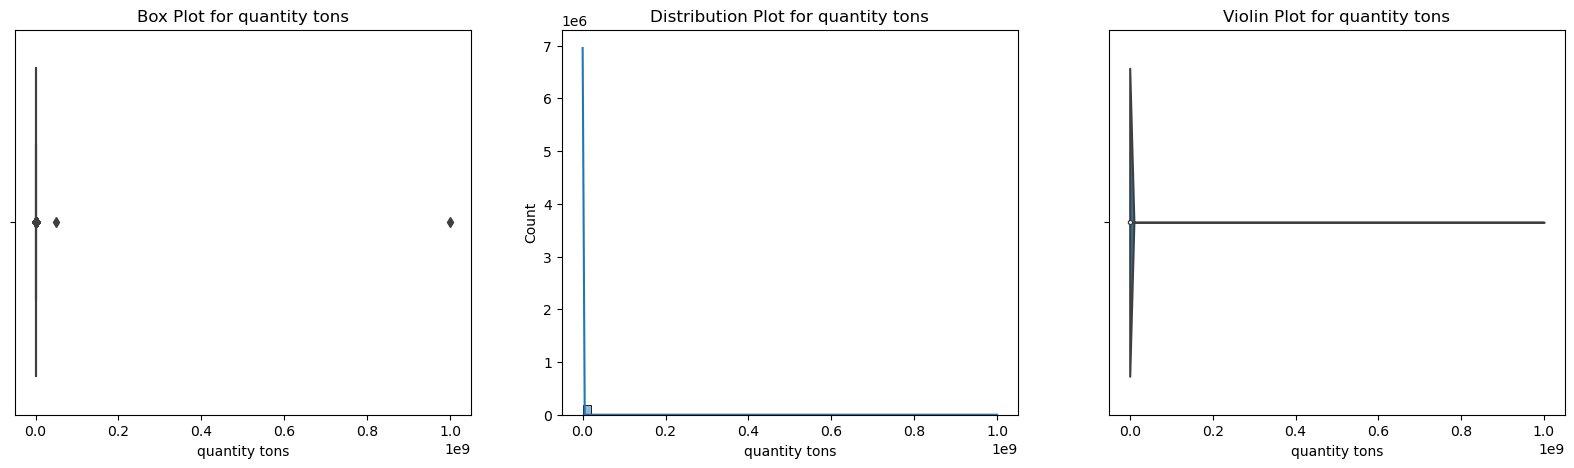

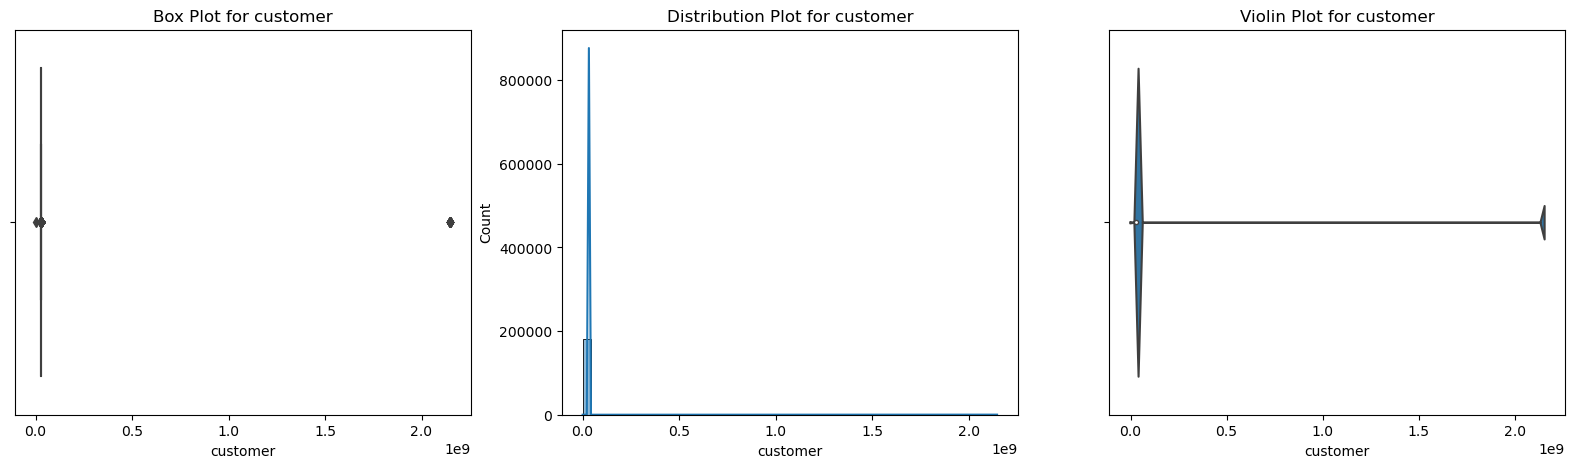

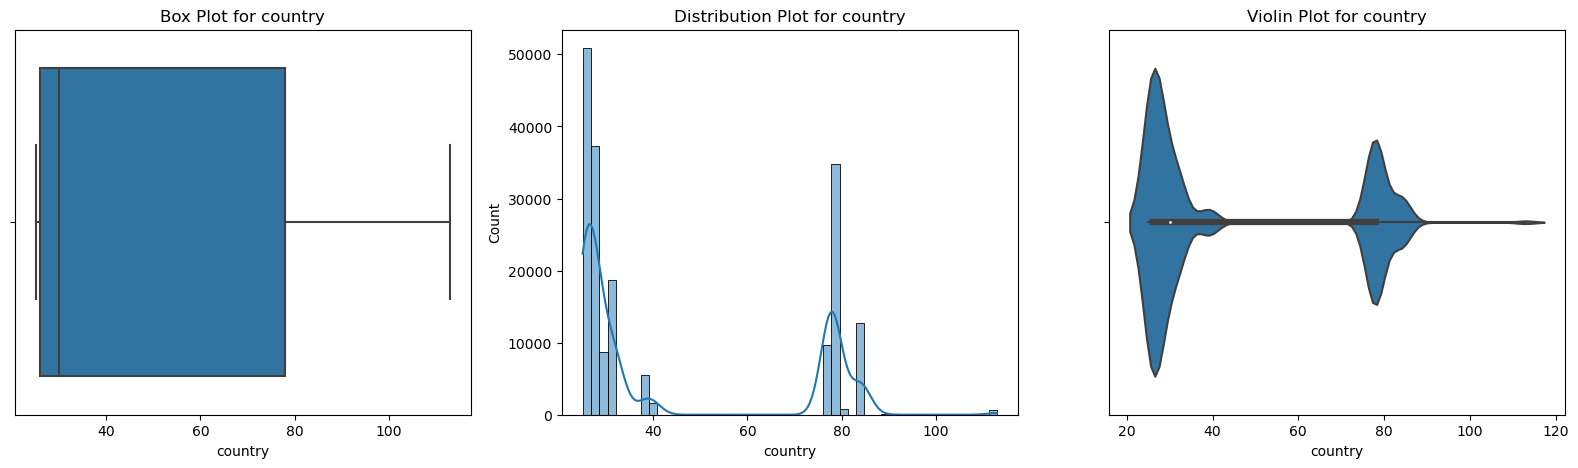

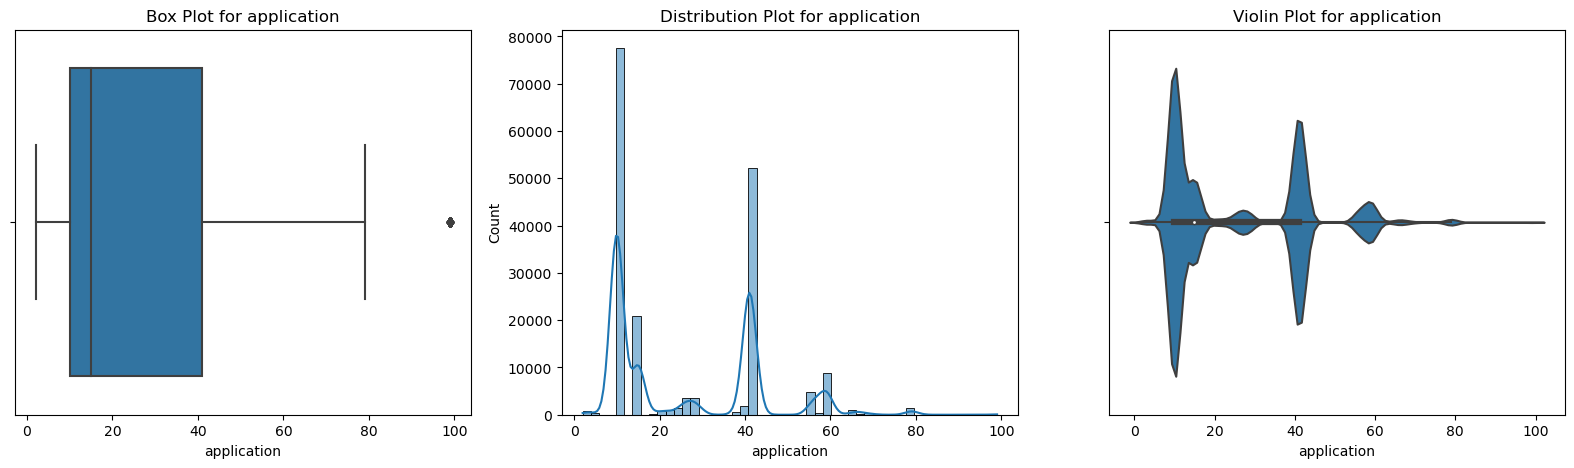

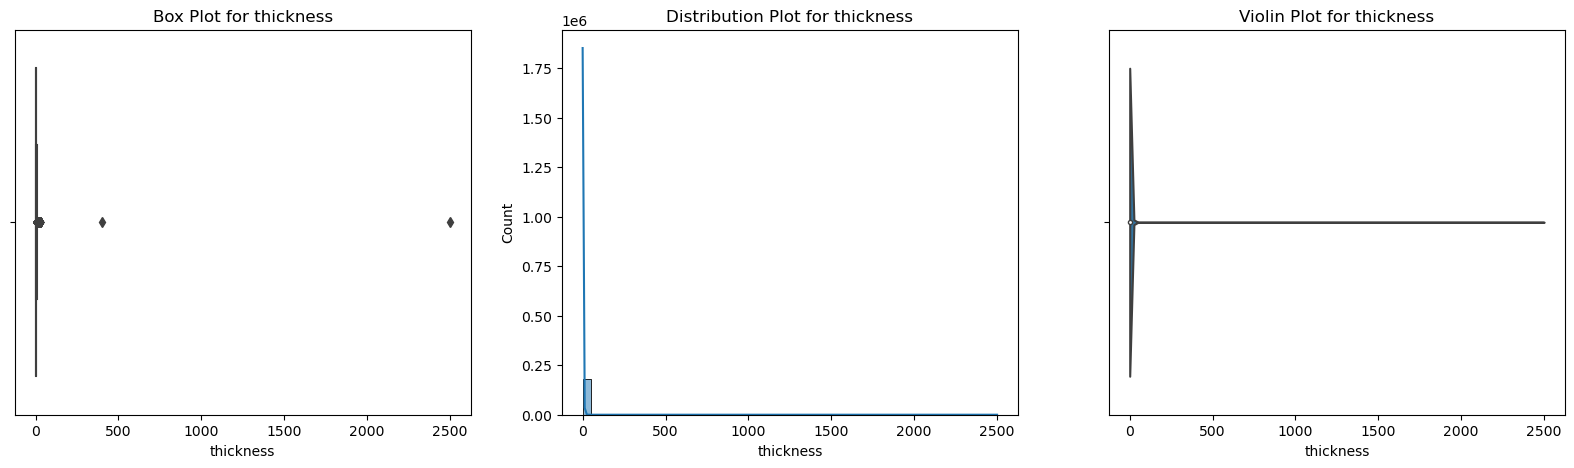

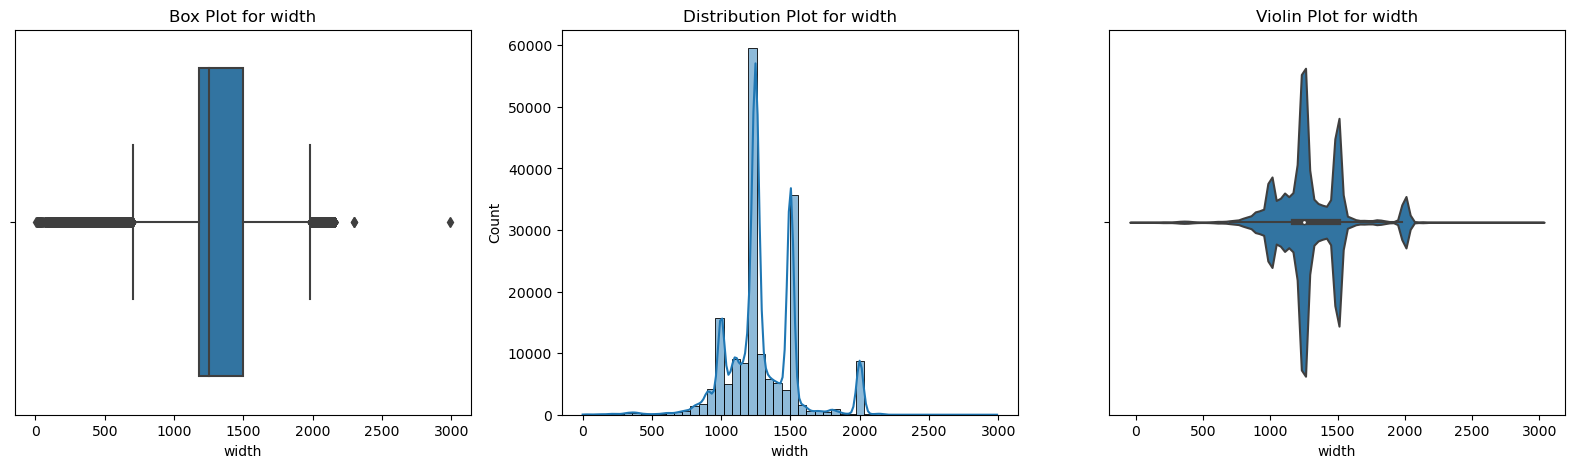

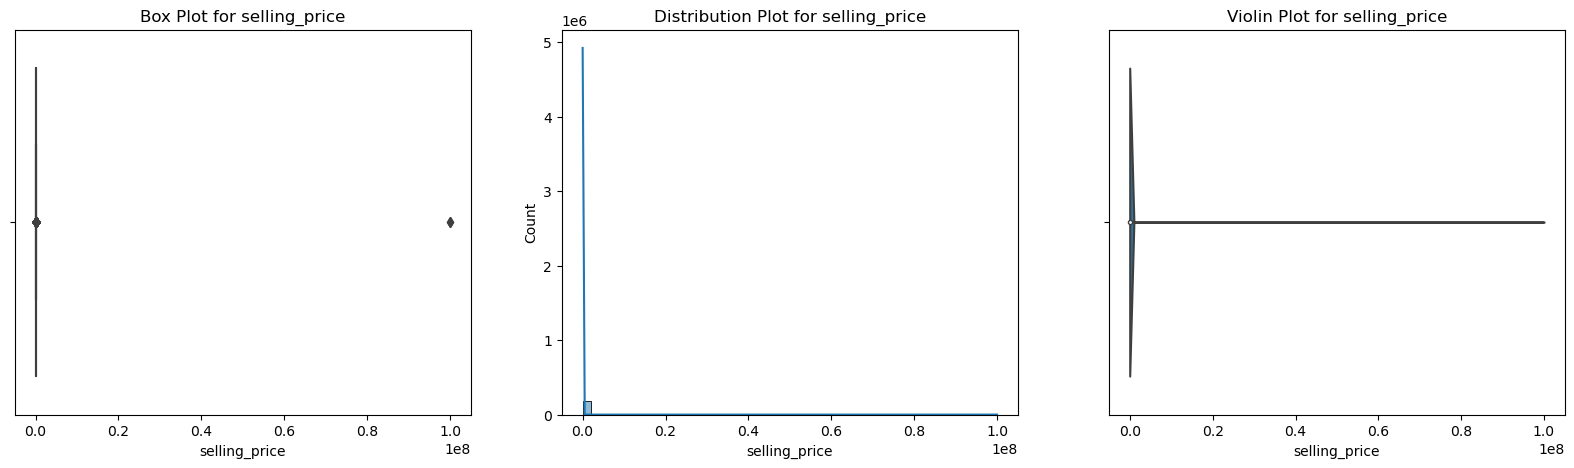

In [24]:
for i in ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [25]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data
df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['width_log'] = np.log(df1['width'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,width_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,7.313220,6.749931
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,7.098376,6.953684
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.858565,6.468211
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,7.183112,6.643790
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,7.600902,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,7.106606,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,7.313220,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,7.130899,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,7.130899,6.398595


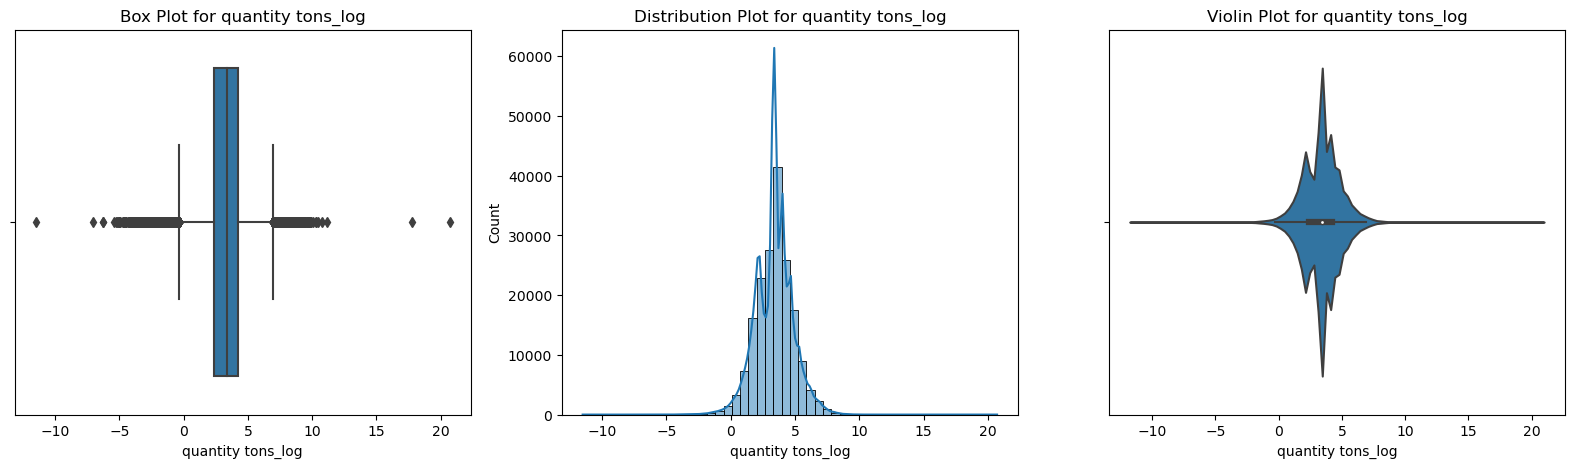

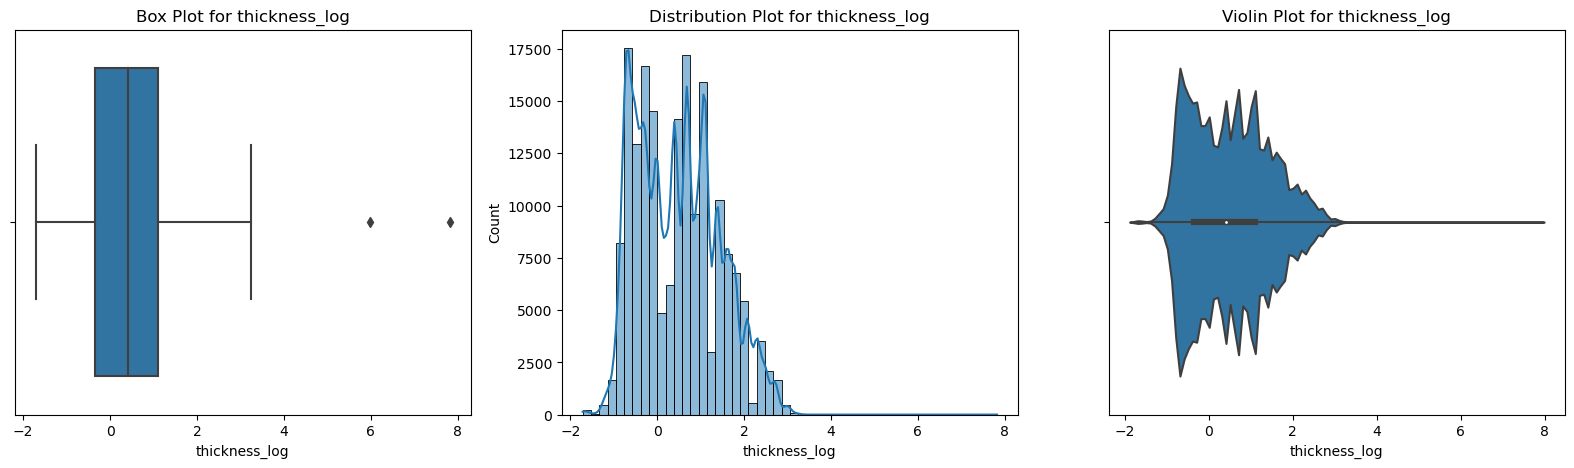

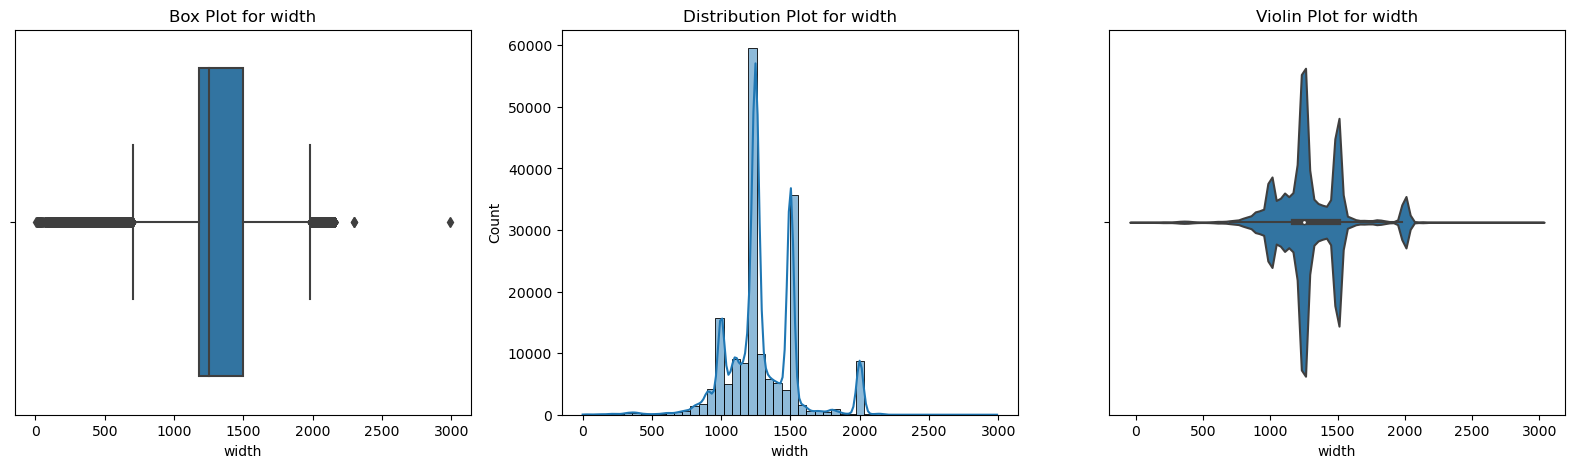

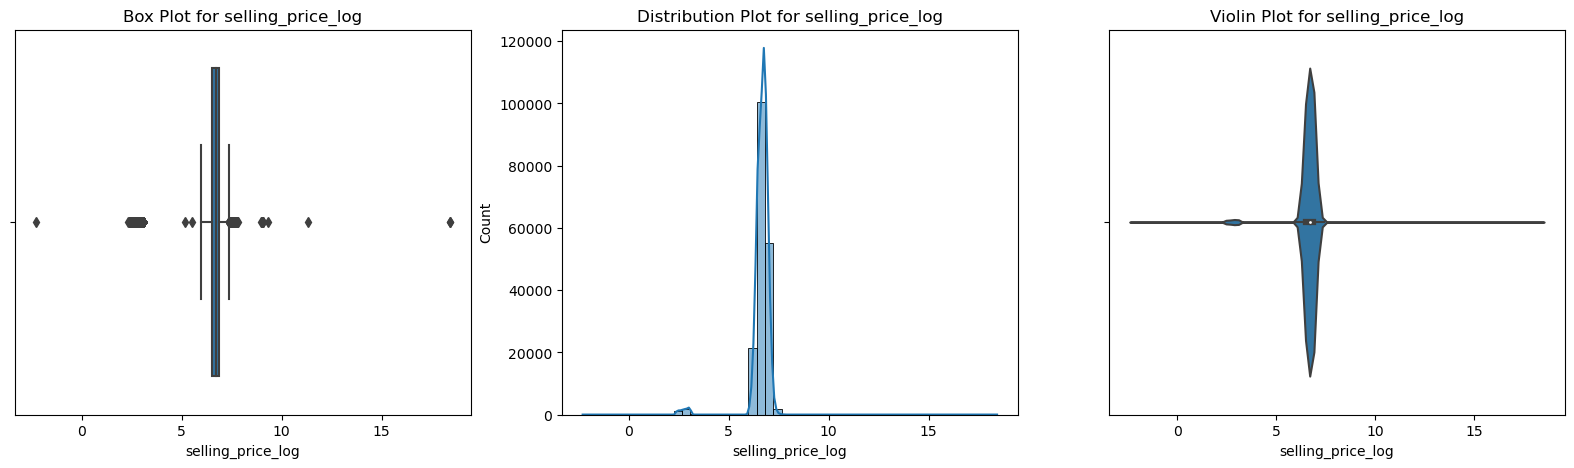

In [26]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [27]:
df2 = df1.copy()
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,width_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,7.313220,6.749931
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,7.098376,6.953684
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.858565,6.468211
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,7.183112,6.643790
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,7.600902,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,7.106606,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,7.313220,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,7.130899,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,7.130899,6.398595


In [28]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [29]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,width_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,7.313220,6.749931
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,7.098376,6.953684
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.858565,6.468211
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,7.183112,6.643790
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,7.600902,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,7.106606,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,7.313220,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,7.130899,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,7.130899,6.398595


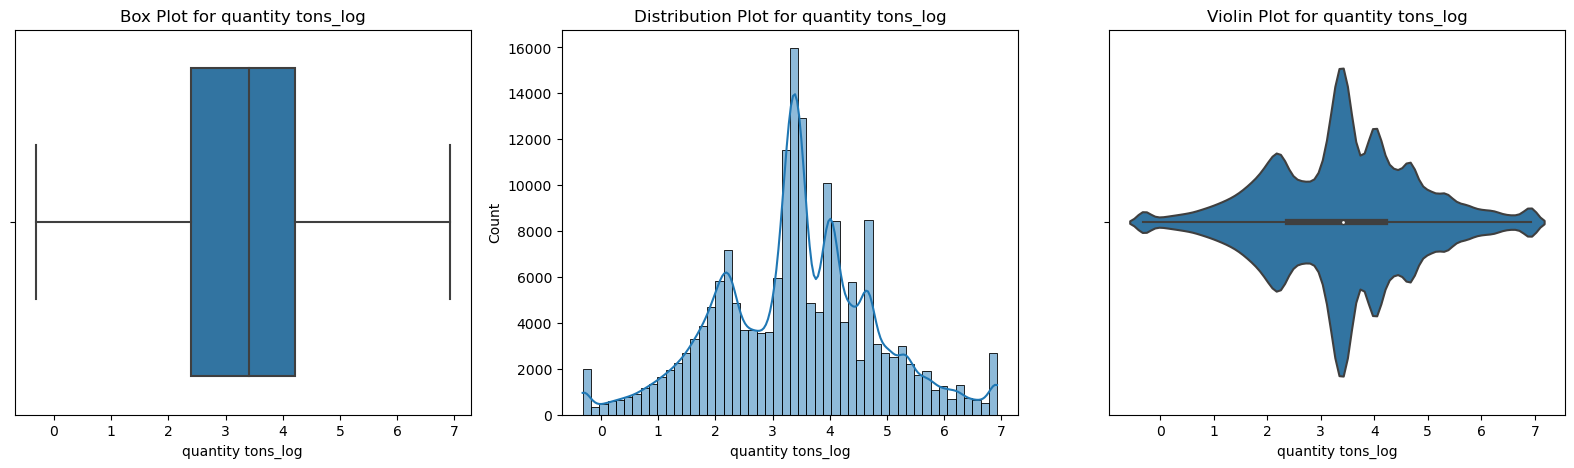

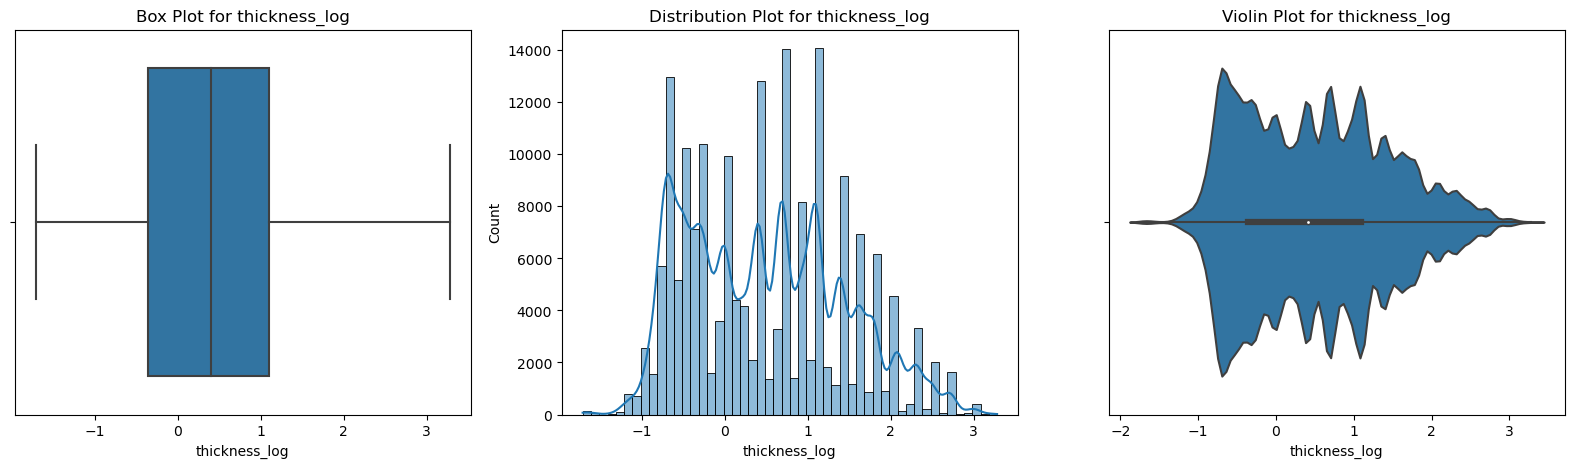

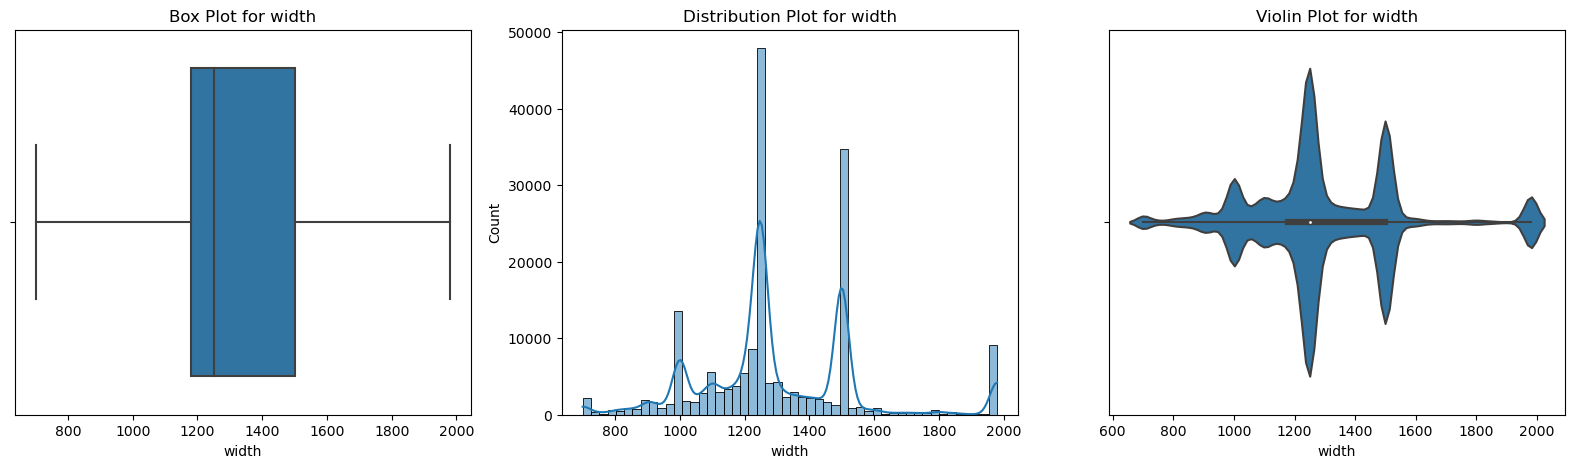

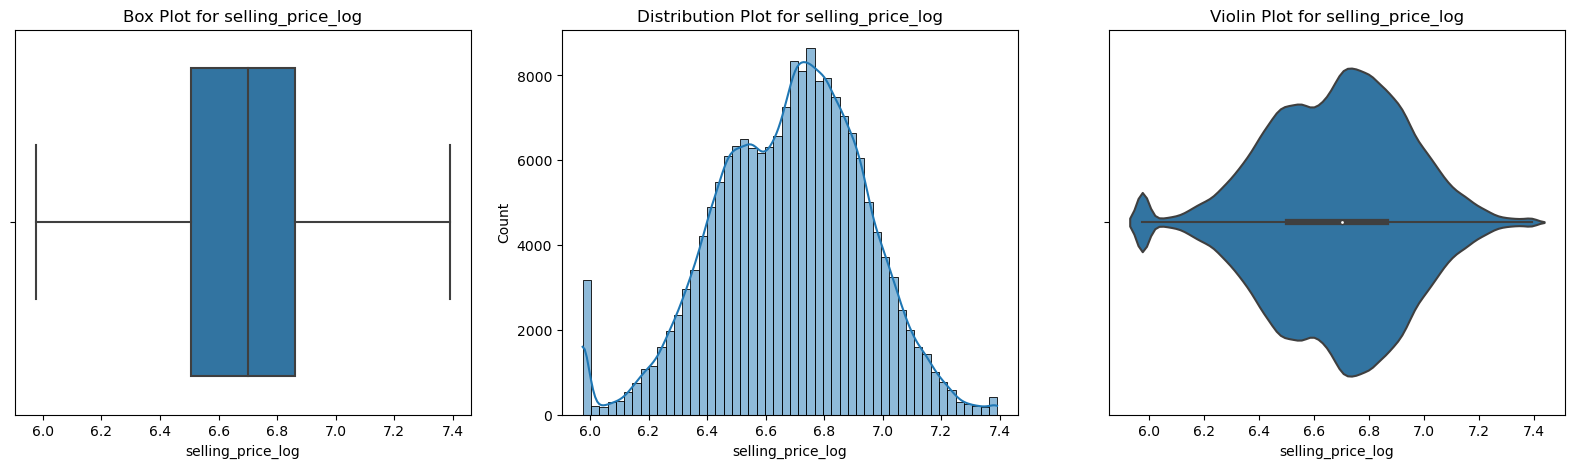

In [30]:
# transform the outliers to within range using IQR and clip() methods - box plot
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)

In [31]:
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181673.0,2.020738e+07,2.411052e+04,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181673.0,1.918076e+03,3.317947e+05,1.000000e-01,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [32]:
# after add the new column of 'quantity tons_log', 'thickness_log', 'selling_price_log', drop the existing columns
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3
     

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,width_log,selling_price_log
0,20210401.0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,7.313220,6.749931
1,20210401.0,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,7.098376,6.953684
2,20210401.0,30153963.0,30.0,Won,WI,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.858565,6.468211
3,20210401.0,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,7.183112,6.643790
4,20210401.0,30211560.0,28.0,Won,W,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,7.600902,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,Won,W,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,7.106606,6.381816
181669,20200702.0,30200854.0,25.0,Won,W,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,7.313220,6.378426
181670,20200702.0,30200854.0,25.0,Won,W,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,7.130899,6.428105
181671,20200702.0,30200854.0,25.0,Won,W,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,7.130899,6.398595


In [33]:
# check the data types
df3.dtypes

item_date            float64
customer             float64
country              float64
status                object
item type             object
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery date_1       object
quantity tons_log    float64
thickness_log        float64
width_log            float64
selling_price_log    float64
dtype: object

In [35]:
df3.dropna(inplace=True)
len(df3)

181673

<Axes: >

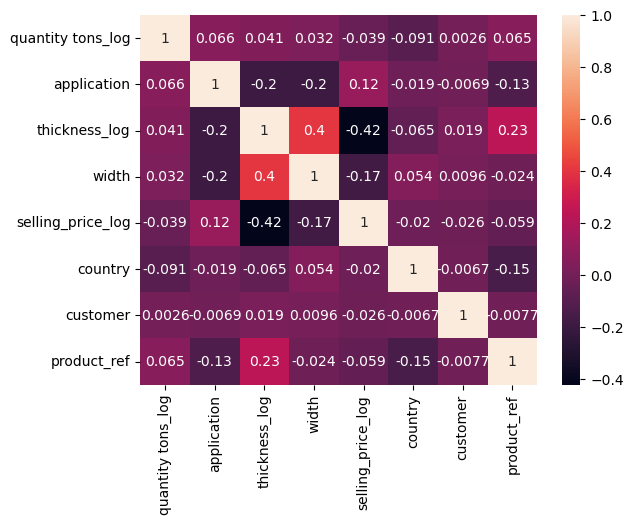

In [36]:
#Heatmap
x=df3[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True)

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [38]:
#split data into X, y
X=df3[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df3['selling_price_log']

In [39]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()

In [40]:
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [44]:
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.02185095010146714
R-squared: 0.6607185477551814


In [49]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

0.673100319762375

In [50]:
y_predict = xgb_model.predict(X_test)


In [51]:
mean_squared_error(y_test, y_predict)


0.022328318020476766

In [52]:
xgb_model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [67]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [823.27137083]


In [68]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [69]:
print(len(df3))
df3.head(3)

181673


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,width_log,selling_price_log
0,20210401.0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,7.313220,6.749931
1,20210401.0,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,7.098376,6.953684
2,20210401.0,30153963.0,30.0,Won,WI,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.858565,6.468211


In [70]:
df_c = df3[df3['status'].isin(['Won', 'Lost'])]
len(df_c)

150450

In [71]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

In [72]:
Y = df_c['status']
X= df_c[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

In [73]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9153871718178797
Confusion Matrix:
[[ 5684  1279]
 [ 1267 21860]]


In [74]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 5684  1279]
 [ 1267 21860]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      6963
           1       0.94      0.95      0.94     23127

    accuracy                           0.92     30090
   macro avg       0.88      0.88      0.88     30090
weighted avg       0.92      0.92      0.92     30090



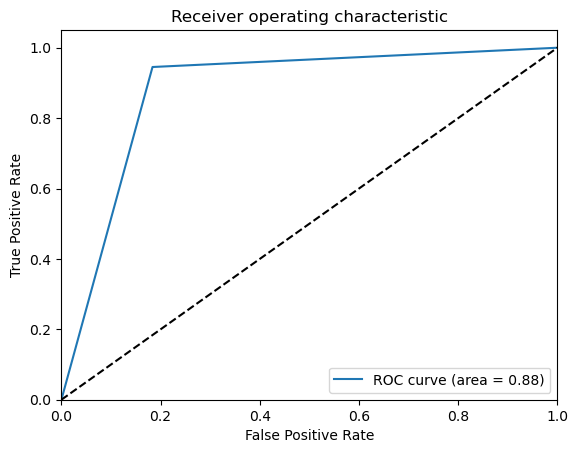

In [75]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [85]:
#ExtraTreesClassifier classification
extra_tree_model_class = ExtraTreesClassifier()

In [86]:
extra_tree_model_class.fit(X_train, y_train)

ExtraTreesClassifier()

In [87]:
y_pred = extra_tree_model_class.predict(X_test)

In [93]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = extra_tree_model_class.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [94]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(extra_tree_model_class, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)